# Demo: Overfitting, Weight-Regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

$w_\mathrm{new} = w - \alpha\nabla J(w)$

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + 4x^2 - 2x - 0.5$.

In [ ]:
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,25)
y_true = np.polyval(p,x)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y_true,'ob',markeredgecolor='black')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [ ]:
nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [ ]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

### Design Matrix

We have the design matrix as $D = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{M}\\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^{M}
\end{bmatrix}$

- Complete the design matrix and set M = 25, the shape of the design matrix should be (15, 26)

In [ ]:
def design_matrix(x, m):
    return x[:, None] ** np.arange(m+1)[None, :]


M = 10
Xtrain = design_matrix(xtrain, M)
Xval = design_matrix(xval,M)
Xtest = design_matrix(xtest,M)
print(Xtrain.shape, )

In [30]:
def rmse(reg, x, y):
    yhat = reg.predict(x)
    return np.sqrt((y - yhat) ** 2).mean()


def test_regression_model(model_type, plot=False, **kwargs):
    if kwargs is None:
        kwargs = {}
    reg = model_type(**kwargs, fit_intercept=False)
    reg.fit(Xtrain, ytrain[:, None])
    w = reg.coef_

    # RMSEs
    train_rmse = rmse(reg, Xtrain, ytrain)
    val_rmse = rmse(reg, Xval, yval)
    test_rmse = rmse(reg, Xtest, ytest)

    # plotting
    if plot:
        xplt = np.linspace(-1,1,500)
        yplt = reg.predict(design_matrix(xplt, M))

        plt.figure()
        plt.plot(xplt, yplt)
        plt.plot(xtrain,ytrain,'x',markeredgecolor='black')
        plt.plot(xval,yval,'o',markeredgecolor='black')
        plt.xlim([-1.1,1.1])
        plt.ylim([-3,4])
        plt.legend(['Model','Train Points', 'Validation Points'])
        plt.title(model_type.__name__)
        plt.show()

    return train_rmse, val_rmse, test_rmse, w.flatten()

In [ ]:
train, val, test, w = test_regression_model(linear_model.LinearRegression, plot=True)
print(f"Train RMSE: {train:.3f}")
print(f"Validation RMSE: {val:.3f}")
print(f"Test RMSE: {test:.3f}")
print(w)

### weight based regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


- Ridge: L2 norm regularizer $\displaystyle\|y - Xw\|^2_2 + \alpha\|w\|^2_2$

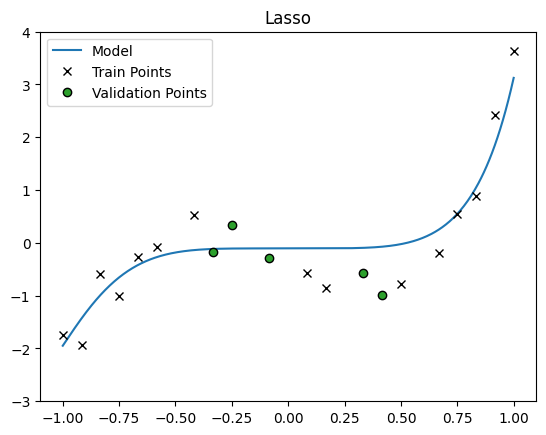

Train RMSE: 0.410
Validation RMSE: 0.413
Test RMSE: 0.498


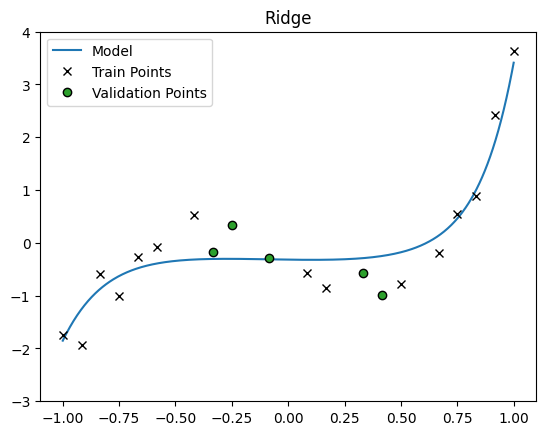

Train RMSE: 1.410
Validation RMSE: 0.353
Test RMSE: 0.349


In [33]:
# Using the following models to fit the data
# reg = linear_model.Lasso(alpha=.02, fit_intercept=False)
# reg = linear_model.Ridge(alpha=.05, fit_intercept=False)
train, val, test, w = test_regression_model(linear_model.Lasso, plot=True, alpha=.05)
print(f"Train RMSE: {train:.3f}")
print(f"Validation RMSE: {val:.3f}")
print(f"Test RMSE: {test:.3f}")

train, val, test, w = test_regression_model(linear_model.Ridge, plot=True)
print(f"Train RMSE: {train:.3f}")
print(f"Validation RMSE: {val:.3f}")
print(f"Test RMSE: {test:.3f}")
